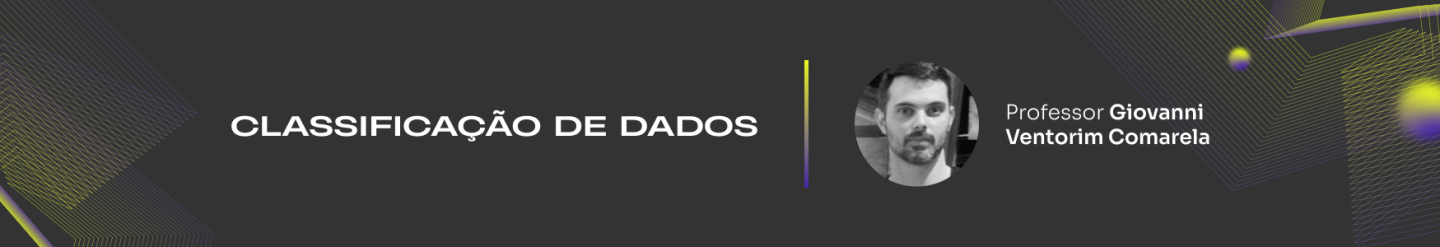

# Métricas de Avaliação

## Nosso problema de interesse

Dados $D = \{(\mathbf{x}_i, y_i)\}_{i=1}^n$, a tarefa de classificação consiste em encontrar um modelo $f$ que aprenda dos vetores de características os rótulos.

Há dois requisitos principais:

1. Se $(\mathbf{x}, y) \in D$, então $f(\mathbf{x}) = y$ com alta probabilidade.

2. A função aprendida deve ser **generalizável**. Se um novo $\mathbf{x}$ não pertencente ao conjunto $D$ for observado, deseja-se também que $f(\mathbf{x})$ seja o rótulo correto de $\mathbf{x}$ com alta probabilidade.

### Principais desafios experimentais

1. Como avaliar um classificador?
2. Como construir um classificador que seja generalizável?

## Questão de hoje

**Entrada:**
1. Um classificador, $C$, já treinado
2. Um conjunto de dados rotulados, $T = \{(\mathbf{x}_i, y_i)\}_{i=1}^m$, que usaremos para avaliar $C$. $T$ é chamado de conjunto de **teste**.

**Saída:**
- Um conjunto de métricas e visualizações que vão nos permitir responder a pergunta "$C$ é um bom classificador para o conjunto $T$?"

### Mudando um pouco a pergunta

Vamos começar com um caso simples, o de classificação binária. Em outras palavras, $y_i \in \{0, 1\}$.

Dizemos que o rótulo 1 é a **classe positiva** e o rótulo 0 é a **classe negativa**.

Nosso primeiro passo será usar o classificador $C$ para "prever" os rótulos de $\mathbf{x}_1, \dots, \mathbf{x}_m$.

Vamos denotar por $\hat{y}_i$ a classe predita de $\mathbf{x}_i$. Em outras palavras:
$$\hat{y}_i = C(\mathbf{x}_i).$$

Dizer se $C$ é um bom classificador em $T$ é o mesmo que dizer o quão próximo o vetor $[y_1, \dots, y_m]^T$ está de $[\hat{y}_1, \dots, \hat{y}_m]^T$.

Alguma sugestão inicial?
- Em aulas passadas, vimos a acurácia. Nessa aula, vamos formalizar esse conceito e ver outras métricas interessantes.

## Matriz de confusão

### Definição

Como $y_i \in \{0, 1\}$ e $\hat{y}_i \in \{0,1\}$, nós temos quatro possíveis situações:
1. $y_i = 1$ e $\hat{y}_i = 1$, um **positivo verdadeiro**
2. $y_i = 0$ e $\hat{y}_i = 1$, um **positivo falso**
3. $y_i = 0$ e $\hat{y}_i = 0$, um **negativo verdadeiro**
4. $y_i = 1$ e $\hat{y}_i = 0$, um **negativo falso**.

Assim, são definidas as seguintes quantidades:

1. $TP = |\{(\mathbf{x}, y) \in T: y = 1 \text{ e } C(\mathbf{x}) = 1\}|$, total de **positivos verdadeiros**
2. $FP = |\{(\mathbf{x}, y) \in T: y = 0 \text{ e } C(\mathbf{x}) = 1\}|$, total de **positivos falsos**
3. $TN = |\{(\mathbf{x}, y) \in T: y = 0 \text{ e } C(\mathbf{x}) = 0\}|$, total de **negativos verdadeiros**
4. $FN = |\{(\mathbf{x}, y) \in T: y = 1 \text{ e } C(\mathbf{x}) = 0\}|$, total de **negativos falsos**

É conveniente organizar essas quantidades em uma matriz para facilitar a visualização:
$$
\begin{bmatrix}
TP & FN\\
FP & TN
\end{bmatrix}
$$

A matriz acima é chamada de **Matriz de Confusão** e é a fonte de uma variedade rica de métricas para avaliação de classificadores.

Da [Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix), temos a versão mais ilustrativa:

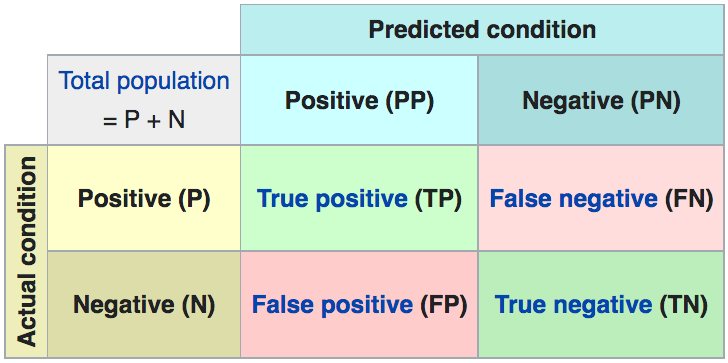

Com base na **Matriz de Confusão**, podemos definir várias métricas de interesse.

## Acurácia

Com as definições acima, podemos facilmente ver que a taxa de acerto do classificador, ou **acurácia**, é dada por:
$$
\text{Acurácia} = \frac{TP + TN}{TP + TN + FP + FN}.
$$

Vejamos um exemplo.

Considere o conjunto de dados abaixo como exemplo. Nos dados, há duas características (``A`` e ``B``) e duas classes (``verde`` e ``vermelho``).

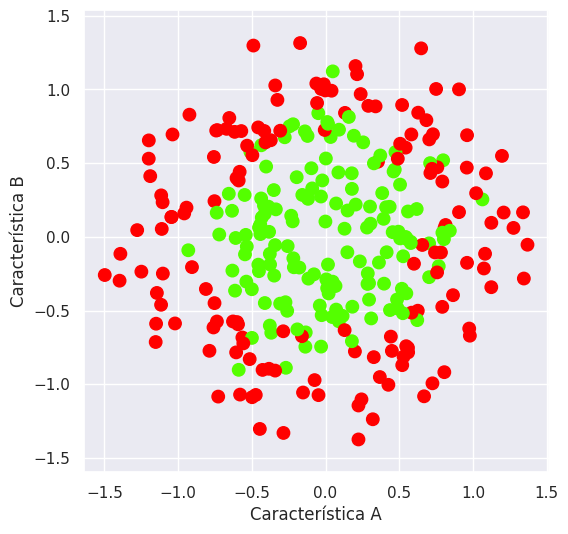

In [ ]:
#@title

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mp
import sklearn
from IPython.display import Image

import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as datasets

sns.set()

X, y = datasets.make_circles(n_samples = 300, noise=.2, factor=.5, random_state=1)

plt.figure(figsize = (6,6))
plt.prism()  # this sets a nice color map
plt.scatter(X[:, 0], X[:, 1], c=y, s = 80)
#plt.axis('off')
plt.axis('equal')
plt.xlabel('Característica A')
plt.ylabel('Característica B');

Vamos dividir o conujunto em questão em subconjuntos de treinamento e teste.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

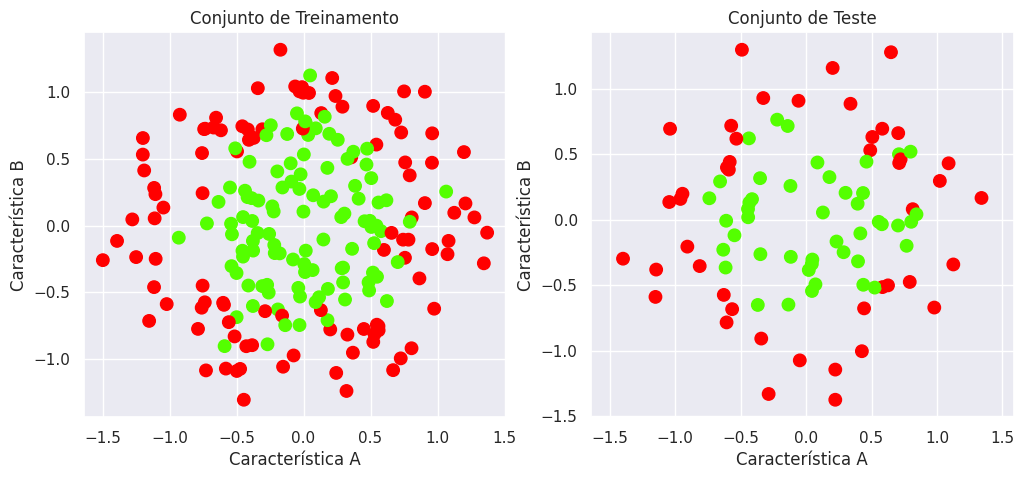

In [ ]:
#@title

fig_size = (12, 5)

plt.figure(figsize = fig_size)
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 80)
plt.axis('equal')
plt.xlabel('Característica A')
plt.ylabel('Característica B');
plt.title('Conjunto de Treinamento')

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, s = 80)
plt.title('Conjunto de Teste')
plt.axis('equal')
plt.xlabel('Característica A')
plt.ylabel('Característica B');

A seguir, o treinamos um KNN (com $k  = 5$) no conjunto de treinamento e utilizamos o classificador treinado para classificar os objetos do conjunto de teste.

In [ ]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

# transformação por reescala
scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# treinamento do classificador
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train_scaled, y_train);

# aplicando a mesma transformação nos dados de teste e
# realizando a classificação
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

Como já vimos em aulas passadas, com a ``scikit-learn``, podemos calcular a acurácia.

In [ ]:
from sklearn.metrics import accuracy_score

print('Acurácia', accuracy_score(y_test, y_pred))

Acurácia 0.8444444444444444


Mas a verdade é que com a ``scikit-learn``, podemos fazer muito mais do que isso.

## Visualizando a matriz de confusão

A matriz de confusão pode ser visualizada por meio do módulo [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html).

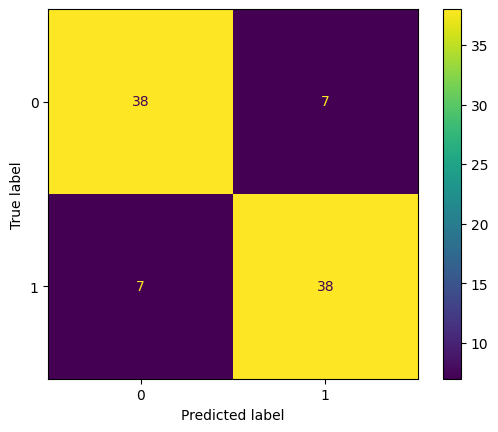

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Também é possível visualizar a mesma matriz, mas normalizando os valores de acordo com a soma das linhas.

Isso pode ser muito útil para analisar o desempenho de classificadores em conjuntos de dados desbalanceados.

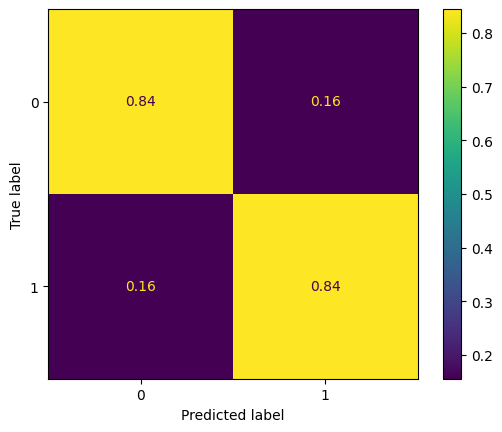

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize = 'true');

## MUITO cuidado com a Acurácia!

Vejamos se vocês realmente entenderam. Suponhamos um classificador com as seguintes características:
1. A Acurácia do classificador no conjunto de teste foi **0.9**!
2. A matriz de confusão do classificador é dada abaixo

In [ ]:
#@title
import pandas as pd
x = np.array([[85, 10],[0, 5]])
mc = pd.DataFrame(x, columns = ['Predito 1', 'Predito 0'])
mc.index = ['Rótulo 1', 'Rótulo 0']
mc


,Predito 1,Predito 0
Rótulo 1,85,10
Rótulo 0,0,5


### Esse é um bom classificador?

**Não!!!** Mas, professor, 0.9 está bem próximo de 1. Esse é um valor alto para acurácia.

- Veja que 95% dos itens sendo classificados são da classe positiva.
- Um outro classificador que "chute" que todos os itens pertencem à classe positiva já tem uma acurácia de 95%.

### Lembrete

**MUITO CUIDADO COM A ACURÁCIA. PARA QUE ELA SEJA INFORMATIVA, DEVE-SE OBSERVAR TAMBÉM A PROPORÇÃO DE ELEMENTOS EM CADA CLASSE!!!**

## Precisão, Revocação e *F1-Score*

Para evitar a armadilha mencionada acima, precisamos de medidas auxiliares. As mais comuns são Precisão (*Precision*), revocação (*Recall*) e *F1-Score*.

Vamos começar com as definições:

1. $$\text{Precision} = \frac{TP}{TP + FP}$$

2. $$\text{Recall} = \frac{TP}{TP + FN}$$

3. $$\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

### Interpretação

- A **Precisão** é a porcentagem de acertos entre todas as **predições para a classe positiva**.

- A **Revocação** é a porcentagem de acertos entre todos os **elementos da classe positiva**.

- O **F1-Score** é a média harmônica entre **precisão** e **revocação**.

As três medidas acima assumem valores entre 0 e 1. Quanto mais próximo de 1, melhor.


### Visualização

Da [Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall),

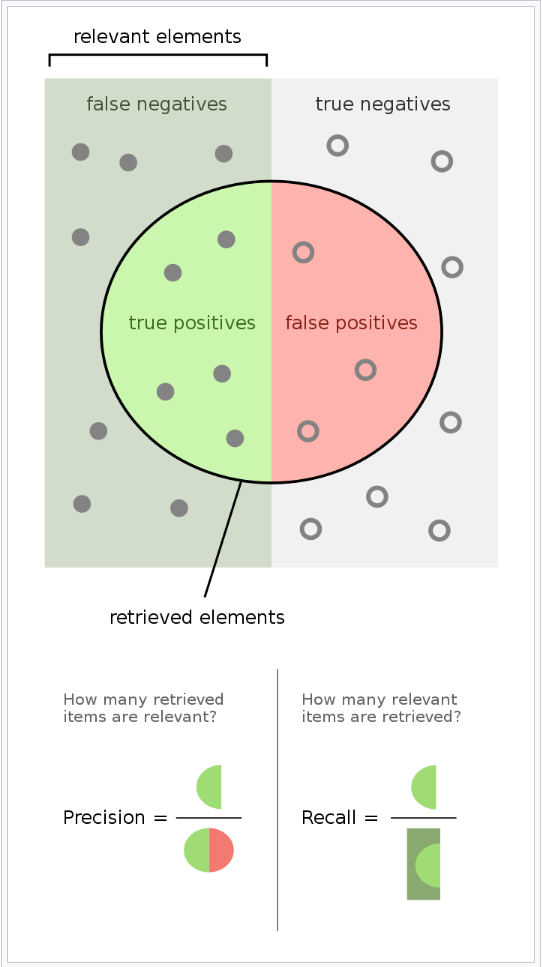

### Interpretação II

Suponham que vocês estejam vendo uma pessoa (e.g., um político) falar sobre um tema $x$.

- **Precisão:** de tudo que a pessoa falou, qual o percentual de verdades sobre $x$?
- **Revocação:** de todas as verdades sobre $x$, qual o percentual foi falado pela pessoa?

Um bom discurso sobre $x$ deve ser formado apenas por verdades (precisão) e deve conter todas as verdades (revocação).

### Na ``scikit-learn``

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
print('Precisão:', precision_score(y_test, y_pred))

Precisão: 0.8444444444444444


In [ ]:
print('Revocação:', recall_score(y_test, y_pred))

Revocação: 0.8444444444444444


In [ ]:
print('F1-Score:', f1_score(y_test, y_pred))

F1-Score: 0.8444444444444444


Podemos combinar todas as medidas com [``classification_report``](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        45
           1       0.84      0.84      0.84        45

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.84      0.84      0.84        90



A saída acima possui várias informações interessante:
- *Precision*, *Recall* e *F1-Score* para todas as classes. Em outras palavras, cada métrica é calculada assumindo que a Classe 1 é a positiva, mas também assumindo que a a Classe 0 é a positiva.
- Acurácia
- ``macro avg``, média aritmética de cada métrica, considerando as diferentes classes.
- ``weighted avg``, média ponderada de cada métrica, considerando as diferentes classes e o número de objetos em cada classe.

### Boa prática

Ao se avaliar um classificador, é considerado uma boa prática analisar, minimamente:
- A matriz de confusão; e
- A saída do ``classification_report``.

## Classificadores não binários

Todas as definições acima podem ser generalizadas de forma natural para classificadores não binários (i.e., quando temos mais de duas classes). Vamos ver um exemplo com 10 classes!

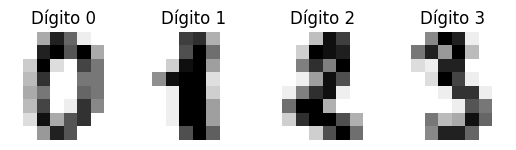

In [ ]:
#@title Reconhecimento e dígitos

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
import seaborn as sns

digits = datasets.load_digits(return_X_y = False)
df = pd.DataFrame(digits.data)

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Dígito %i' % label)

Separando uma porção para treinar o classificador e outra para testar.

In [ ]:
import sklearn.model_selection as model_selection

X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3)

Treinando um KNN (com $k = 5$) e classificando os objetos do conjunto de teste.

In [ ]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

# transformação por reescala
scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# treinamento do classificador
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train_scaled, y_train);

# aplicando a mesma transformação nos dados de teste e
# realizando a classificação
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

Podemos proceder com a matriz de confusão normalmente (na versão de frequências ou normalizada).

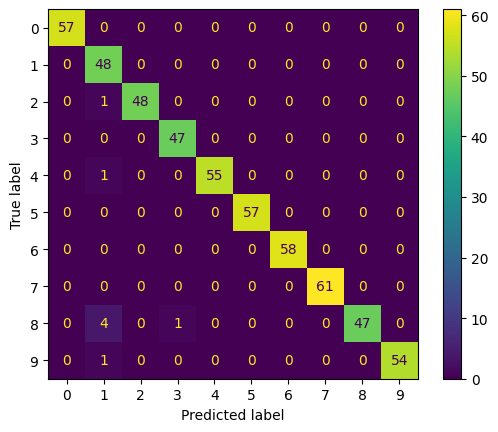

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

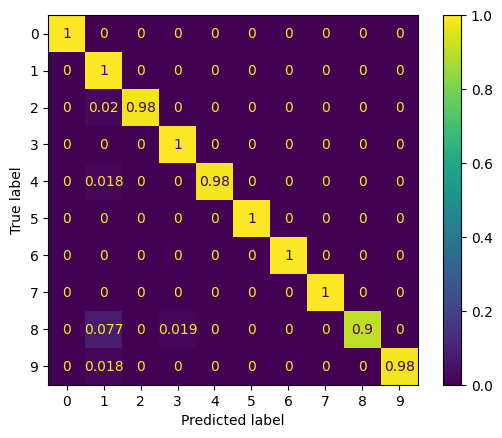

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize = 'true');

E podemos analisar **precisão**, **revocação** e ***F1-Score*** "como se cada uma das classes fosse a classe positiva".

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       0.87      1.00      0.93        48
           2       1.00      0.98      0.99        49
           3       0.98      1.00      0.99        47
           4       1.00      0.98      0.99        56
           5       1.00      1.00      1.00        57
           6       1.00      1.00      1.00        58
           7       1.00      1.00      1.00        61
           8       1.00      0.90      0.95        52
           9       1.00      0.98      0.99        55

    accuracy                           0.99       540
   macro avg       0.99      0.98      0.98       540
weighted avg       0.99      0.99      0.99       540



## Referências

Fontes da aula de hoje:
1. Capítulos 22 do *Livro Data Mining and Machine Learning: Fundamental Concepts and Algorithms* (https://dataminingbook.info/book_html/)

3. Várias páginas da documentação da ``scikit-learn``

4. Várias figuras e definições extraídas de https://en.wikipedia.org/wiki/Precision_and_recall, https://en.wikipedia.org/wiki/Confusion_matrix e https://en.wikipedia.org/wiki/Receiver_operating_characteristic